In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline

#from wordcloud import WordCloud, STOPWORDS
# Skim is a Way to Summarize Pandas Dataframes
#from skimpy import skim

# Analyze sales data to identify opportunities for growth and optimization. 

In [3]:
path='./data/prueba3.csv'
resta_df_original=pd.read_csv(path,on_bad_lines='skip', sep=',')

C:\Users\luzna\AppData\Local\Temp\ipykernel_16580\1902978275.py:2: DtypeWarning: Columns (19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  resta_df_original=pd.read_csv(path,on_bad_lines='skip', sep=',')


In [4]:
#Make a copy from the original dataset
resta_df=resta_df_original.copy()

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Exploratory Data Analysis

### Examining the data

In [6]:
resta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505575 entries, 0 to 505574
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_pedido             505575 non-null  int64  
 1   fecha_sistema         505575 non-null  object 
 2   hora                  505575 non-null  object 
 3   clasificador_grupo    505575 non-null  object 
 4   clasificacion         474780 non-null  object 
 5   producto              505575 non-null  object 
 6   state                 505575 non-null  object 
 7   precio                505575 non-null  float64
 8   cantidad              505575 non-null  int64  
 9   a_pagar_xprod         505575 non-null  float64
 10  pago_pedido_tot       505575 non-null  float64
 11  product_observations  103879 non-null  object 
 12  tipo_forma_pago       505575 non-null  object 
 13  monto                 505575 non-null  float64
 14  observaciones_pedido  0 non-null       float64
 15  

In [7]:
resta_df.shape

(505575, 27)

In [13]:
resta_df.size

13650525

In [14]:
resta_df.head()

,id_pedido,fecha_sistema,hora,clasificador_grupo,clasificacion,producto,state,precio,cantidad,a_pagar_xprod,pago_pedido_tot,product_observations,tipo_forma_pago,monto,observaciones_pedido,pagado_cliente,cambio,ubicacion,numero_pedido,fecha_modificacion,motivo_modificacion,es_anulado,es_cortesia,estado,saldo_inicial,saldo_final,stateprod
0,3208,2016-07-05,21:46:33.0000000,MENU,Sandwiches,Niki's club,ACTIVO,18.0,1,18.0,18.0,NaN,EFE,18.0,NaN,100.0,82.0,0 - Para llevar,2,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
1,3209,2016-07-05,22:00:30.0000000,MENU,Sandwiches,Sand de Pollo BBQ,ACTIVO,20.0,1,20.0,20.0,NaN,EFE,20.0,NaN,100.0,80.0,1 - Mesa 1,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
2,3210,2016-07-05,23:04:04.0000000,MENU,Fingers,Fingers miel,ACTIVO,22.0,1,22.0,30.0,NaN,EFE,30.0,NaN,30.0,0.0,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
3,3210,2016-07-05,23:04:04.0000000,BEBIDAS,jugos - aguas,Aquarius 500,ACTIVO,8.0,1,8.0,30.0,NaN,EFE,30.0,NaN,30.0,0.0,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
4,3211,2016-07-07,23:03:19.0000000,MENU,Alitas 8 UNIDADES,Alitas Barbacoa,ACTIVO,27.0,1,27.0,81.0,NaN,EFE,81.0,NaN,100.0,19.0,20 - Mesa 20,1,NaN,NaN,NaN,NaN,CERRADO,500.0,0.0,ACTIVO


In [15]:
resta_df.columns

Index(['id_pedido', 'fecha_sistema', 'hora', 'clasificador_grupo',
       'clasificacion', 'producto', 'state', 'precio', 'cantidad',
       'a_pagar_xprod', 'pago_pedido_tot', 'product_observations',
       'tipo_forma_pago', 'monto', 'observaciones_pedido', 'pagado_cliente',
       'cambio', 'ubicacion', 'numero_pedido', 'fecha_modificacion',
       'motivo_modificacion', 'es_anulado', 'es_cortesia', 'estado',
       'saldo_inicial', 'saldo_final', 'stateprod'],
      dtype='object')

In [8]:
#Change column names
resta_df.columns=['order_id', 'system_date', 'time', 'group_classifier',
        'classification', 'product', 'prod_state', 'price', 'quantity',
        'to_pay_xprod', 'tot_order_payment', 'product_observations',
        'type_payment_form', 'amount', 'order_observations', 'customer_pay',
        'change', 'location', 'order_number', 'modification_date',
        'modification_reason', 'is_cancelled', 'is_courtesy', 'status',
        'start_balance', 'end_balance', 'stateprod']
#, 'waiter_name'

### Reviewing data types

In [9]:
resta_df.dtypes

order_id                  int64
system_date              object
time                     object
group_classifier         object
classification           object
product                  object
prod_state               object
price                   float64
quantity                  int64
to_pay_xprod            float64
tot_order_payment       float64
product_observations     object
type_payment_form        object
amount                  float64
order_observations      float64
customer_pay            float64
change                  float64
location                 object
order_number              int64
modification_date        object
modification_reason      object
is_cancelled             object
is_courtesy              object
status                   object
start_balance           float64
end_balance             float64
stateprod                object
dtype: object

In [10]:
resta_df.sample(4)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,tot_order_payment,product_observations,type_payment_form,amount,order_observations,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
425976,543719,2022-01-06,20:10:18.0000000,OTROS,NaN,Papas adicionales,ACTIVO,10.0,1,10.0,74.5,NaN,EFE,74.5,NaN,74.5,0.0,. - Sin Mesa,106,NaN,NaN,NaN,False,CERRADO,0.0,0.0,ACTIVO
152489,277383,2018-11-12,21:54:07.0000000,BEBIDAS,frutal Valle,1 llitro frutal,ACTIVO,15.0,1,15.0,71.0,NaN,EFE,71.0,NaN,71.0,0.0,. - Sin Mesa,52,NaN,NaN,NaN,False,CERRADO,0.0,0.0,ACTIVO
432643,548006,2022-02-03,14:52:13.0000000,MENU,Alitas 8 UNIDADES,Alitas Miel Mostaza,ACTIVO,32.0,1,32.0,39.0,y jack,EFE,39.0,NaN,39.0,0.0,0 - Para llevar,48,NaN,NaN,NaN,False,CERRADO,0.0,0.0,ACTIVO
129510,237330,2018-08-18,22:01:29.0000000,MENU,Alitas 8 UNIDADES,alita 16 unidades,INACTIVO,50.0,1,50.0,53.0,bbq y albahaca,EFE,53.0,NaN,53.0,0.0,. - Sin Mesa,58,NaN,NaN,NaN,False,CERRADO,0.0,0.0,INACTIVO


In [ ]:
# Convert data type to date time
resta_df['system_date']=pd.to_datetime(resta_df['system_date'], format='%Y-%m-%d')

In [20]:
resta_df['time']=pd.to_datetime(resta_df['time'], format='%H:%M:%S.%f')

### Preliminar Analysis

Revenue analysis

In [21]:
#Revenue by group_classifier 
resta_df.groupby(['group_classifier'])['tot_order_payment'].sum().sort_values(ascending=False)

group_classifier
MENU       24101543.5
BEBIDAS     6104024.0
OTROS       1382407.0
Name: tot_order_payment, dtype: float64

<Axes: xlabel='group_classifier'>

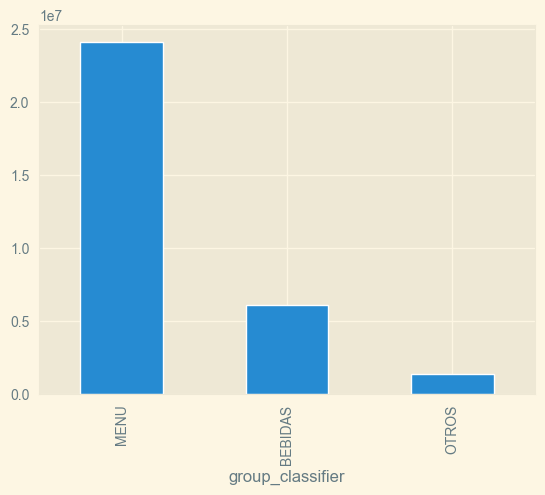

In [22]:
#Revenue by group_classifier 
resta_df.groupby(['group_classifier'])['tot_order_payment'].sum().sort_values(ascending=False).plot(kind='bar')

In [23]:
#Revenue by parent_product 
resta_df.groupby(['group_classifier','classification'])['tot_order_payment'].sum().sort_values(ascending=False)

group_classifier  classification           
MENU              Alitas 8 UNIDADES            6691446.0
                  ALITAS 6 UNIDADES  26 bs     3763378.0
                  Fingers                      2957264.5
                  Burguers                     1719826.5
BEBIDAS           Personal                     1651288.5
MENU              ALITAS 4 UNIDADES   19 bs    1509392.0
                  Salchis                      1438165.0
BEBIDAS           Popular                      1227109.5
MENU              ALITAS 12 UNIDADES           1111750.0
                  DELIVERY                     1070695.0
                  ALITAS 16 UNIDADES            981968.5
BEBIDAS           1 LT                          889215.0
                  2 LT                          855167.0
MENU              Platos                        819854.0
                  Sandwiches                    803030.5
BEBIDAS           jugos - aguas                 632030.0
                  frutal Valle              

### Categorical vs Numerical information 

In [24]:
# categorical columns 
categoric_col = [col for col in resta_df.columns if resta_df[col].dtype == 'object']
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [25]:
# numeric columns
numeric_col =[col for col in resta_df.columns if resta_df[col].dtype !='object']
print(f'Numeric columns are: {numeric_col}')

Numeric columns are: ['order_id', 'system_date', 'time', 'price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'order_observations', 'customer_pay', 'change', 'order_number', 'start_balance', 'end_balance']


In [26]:
# numerical but categorical variables
num_but_categorical=[col for col in numeric_col if resta_df[col].nunique() <10]
print(f'Numeric but categorical columns are: {num_but_categorical}')

Numeric but categorical columns are: ['order_observations']


In [27]:
# Adding num_but_cat to cat_cols
categoric_col = num_but_categorical + categoric_col
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [28]:
numeric_datetime=['system_date', 'time', 'modification_date']

numeric_col = [col for col in numeric_col if col not in numeric_datetime and col not in num_but_categorical]

# id_cols removing from num_cols
id_cols=['order_id', 'order_payment_id', 'order_number']
numeric_col=[col for col in numeric_col if col not in id_cols]

print(f"Numerical Cols: {numeric_col} \nCategorical Cols: {categoric_col} \nNumerical but Categorical: {num_but_categorical}")

Numerical Cols: ['price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'customer_pay', 'change', 'start_balance', 'end_balance'] 
Categorical Cols: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod'] 
Numerical but Categorical: ['order_observations']


### Analyzing Numerical Attributes

In [29]:
resta_df[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
price,505575.0,20.317964,13.313448,1.0,12.0,22.0,27.0,130.0
quantity,505575.0,1.572617,2.467471,1.0,1.0,1.0,1.0,154.0
to_pay_xprod,505575.0,24.369989,19.279340,1.0,12.0,22.0,29.0,1056.0
tot_order_payment,505575.0,62.479305,41.544195,1.0,38.0,54.0,76.0,4255.0
amount,505575.0,62.479305,41.544195,1.0,38.0,54.0,76.0,4255.0
customer_pay,505575.0,63.319797,113.625916,1.0,39.0,54.0,77.0,40111.0
change,505575.0,0.829526,105.762322,0.0,0.0,0.0,0.0,40045.5
start_balance,505575.0,6.431271,88.040216,0.0,0.0,0.0,0.0,5000.0
end_balance,504443.0,13.452069,159.143093,0.0,0.0,0.0,0.0,3710.0


In [30]:
#How many years of information there are in this dataframe?
resta_df['system_date'].dt.year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

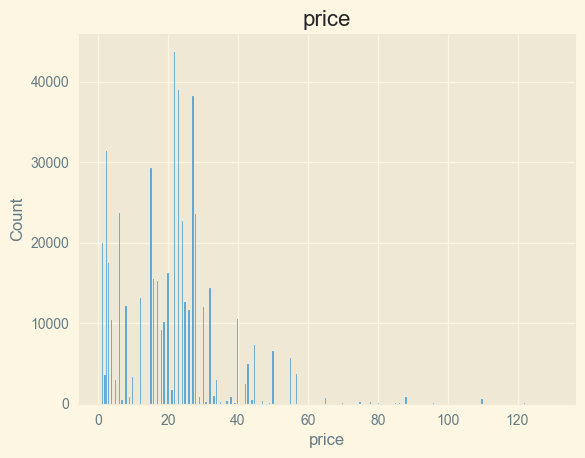

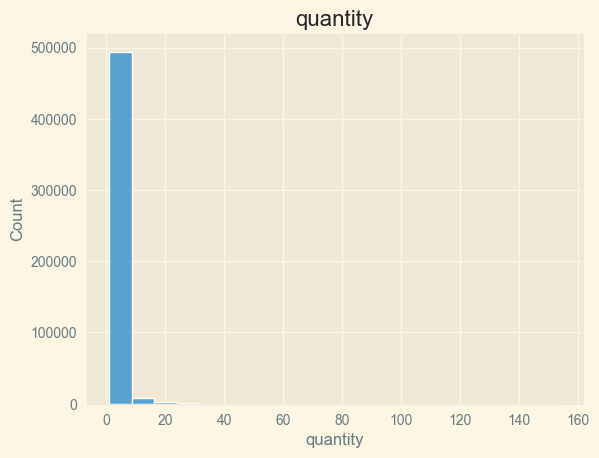

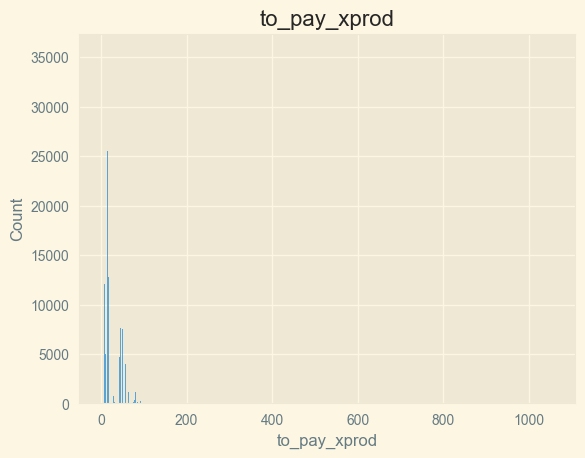

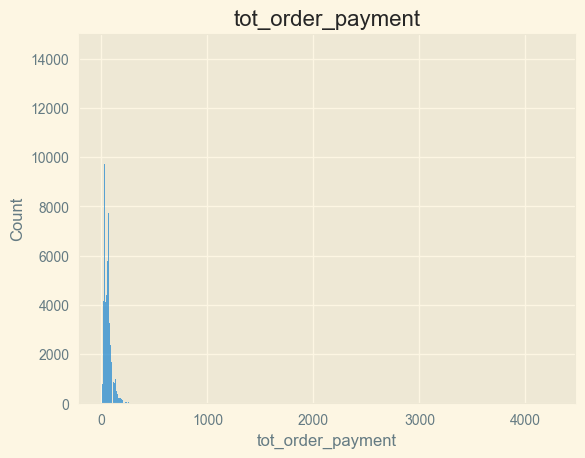

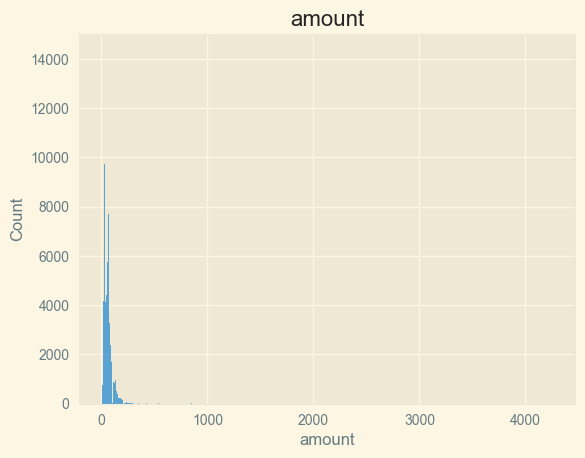

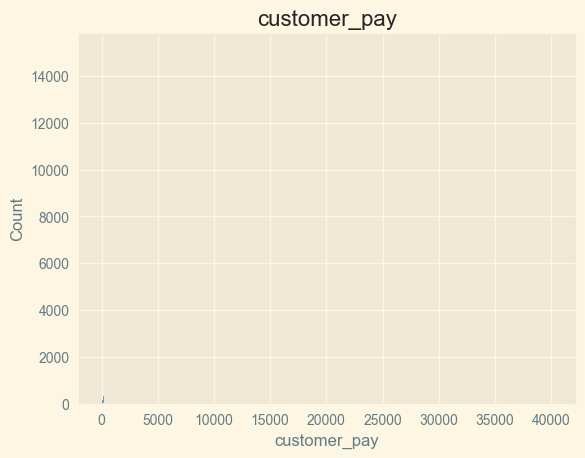

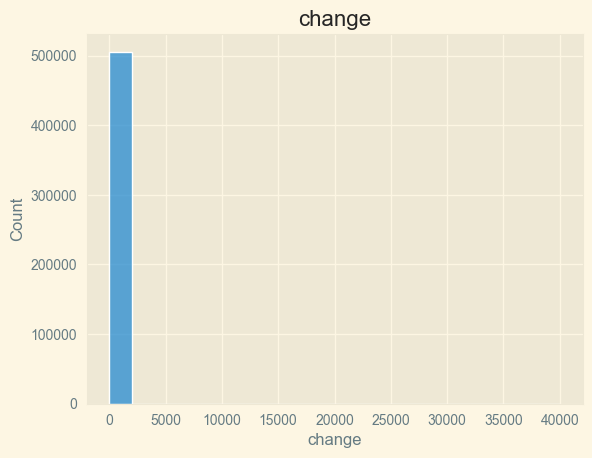

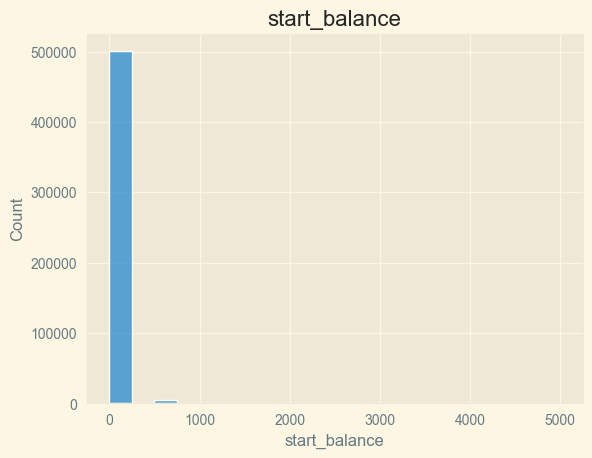

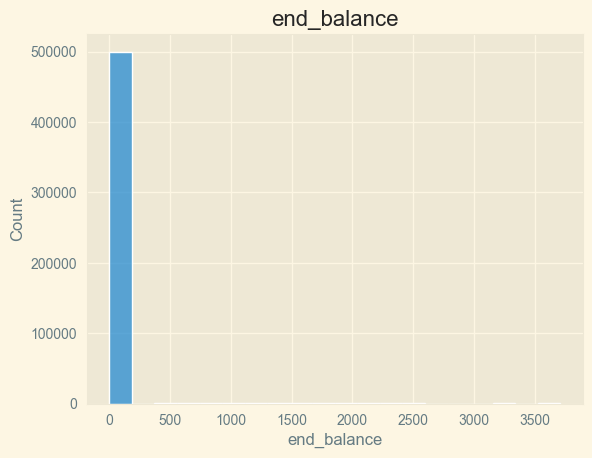

In [31]:
#Plot data for each attribute
for col in numeric_col:
        sns.histplot(x=resta_df[col], data=resta_df).set_title(col)
        plt.show(block=True)

### Analyzing Categorical Attributes

In [ ]:
resta_df[categoric_col]

#### Products by each category

In [ ]:
resta_df.groupby(['group_classifier','classification'])['product'].count().sort_values(ascending=False)

In [ ]:
resta_df.loc[resta_df['group_classifier']=='BEBIDAS' ,'classification'].value_counts().plot(kind='bar')
plt.title('Most_Selling_Item by Category Beverages')
plt.ylabel('Count')


In [ ]:
resta_df.loc[resta_df['group_classifier']=='MENU' ,'classification'].value_counts().plot(kind='bar')
plt.title('Most_Selling_Item by Category menu')
plt.ylabel('Count')

In [ ]:
resta_df.groupby('group_classifier')['product'].count().sort_values(ascending=False)

In [ ]:
resta_df.loc[resta_df['group_classifier']=='OTROS','product'].value_counts().plot(kind='bar')
plt.title('Most_Selling_Item by Category Others')
plt.ylabel('Count')

In [ ]:
resta_df.loc[resta_df['group_classifier']=='BEBIDAS','product'].value_counts().plot(kind='bar')
plt.title('Most_Selling_Item by Category Beverages')
plt.ylabel('Count')

### Categorical variables analysis

In [ ]:
categorical_not_selected=['order_observations','classification','product','product_observations','modification_date','modification_reason','is_cancelled','is_courtesy']
categorical_selected=[col for col in categoric_col if col not in categorical_not_selected]
categorical_selected

In [ ]:
for col in categorical_selected:
    sns.barplot(x=resta_df[col].unique(), y = resta_df[col].value_counts()).set(title=col)
    plt.xticks(rotation=45)
    plt.show(block=True)
    
        

## Data Cleaning 

### Missing values

In [ ]:
#Determining how many values are null in percentage.
((resta_df.isna().sum()/resta_df.shape[0])*100).sort_values(ascending=False)


Since 'order_observations' has 100% of NaN values, is better to erase the entire column.

In [ ]:
resta_df.drop(columns='order_observations', axis=1, inplace=True)

In [ ]:
categoric_col.remove('order_observations')
categoric_col

### NULL VALUES IN 'is_canceled column' 
'is cancelled' is equivalent to say that an order has been annuled  

In [ ]:
resta_df['is_cancelled'].value_counts()

In [ ]:
#Get how many values are NAN in is cancelled column
resta_df['is_cancelled'].isna().sum()

In [ ]:
#In which cases there was reported as 'not cancelled'
resta_df.loc[resta_df['is_cancelled'].isna(),['product','classification']]    

In [ ]:
#In which cases there was reported as 'cancelled'
resta_df.loc[resta_df['is_cancelled']==True,['product','classification']]    

In [ ]:
# If there was a customer who paid and there was a change given, so there has been a purchase completed. 
# Accordingly couldnt be cancelled
resta_df.loc[(resta_df['is_cancelled']==True),['product','to_pay_xprod','tot_order_payment','customer_pay','change','is_cancelled']]

##### Eventhough products which have status in 'is_cancelled' in True, were charged anyway. Which seems as an interesting input to analyze the owner. 
Paid customer, change and is_cancelled are not columns which reflect any important insight, since those seems to be erroneus values placed.


##### Analyze missing assingments 
All products which haven't been cancelled should have 'is_cancelled' status to False, and just 4 of them have it. So next step is fixing this issue.  

In [ ]:
resta_df.loc[(resta_df['is_cancelled']==False),['product','price','quantity','to_pay_xprod','tot_order_payment','customer_pay','change','is_cancelled']].tail(50)

In [ ]:
#NaN values in is_cancelled should be placed in False, since those orders were not cancelled 
resta_df[['product','is_cancelled','tot_order_payment','customer_pay','change']][resta_df['is_cancelled'].isna()]

In [ ]:
#To all NaN values in 'is_cancelled' place False.
resta_df['is_cancelled'].fillna(False, inplace=True)

In [ ]:
resta_df['is_cancelled'].isna().sum()

### NaN values in 'classification' column 

In [ ]:
resta_df['classification'].isna().sum()

In [ ]:
resta_df[['classification','product']][resta_df['classification'].isna()]

According to the data source whenever there are null values in parent_product, means that parent product value is equal to product. 

In [ ]:
#Fill null values with values which are in column product 
resta_df['classification'].fillna(resta_df['product'], inplace=True)

#### NaN values in modification_reason column.
modification_reason, modification_dates, modification_time are related to is_cancelled column, meaning that whenever there is a cancellation there will be data in these columns, otherwise only False in is_cancelled column. NaN values dont require to be erased yet, but NAN values in 'modification_reason'  could be replaced by 'Ninguna'. 

In [ ]:
resta_df['modification_reason'].isna().sum()

In [ ]:
resta_df[['modification_date','modification_reason','is_cancelled']][resta_df['modification_date'].isna()]

In [ ]:
resta_df[~resta_df['modification_reason'].isna()]

In [ ]:
resta_df.loc[(resta_df['is_cancelled']==False),['product','price','quantity','to_pay_xprod','tot_order_payment','customer_pay','change','is_cancelled']].tail(50)

In [ ]:
resta_df.loc[resta_df['modification_reason'].isna(),'modification_reason']='Ninguna'

In [ ]:
resta_df['modification_reason'].isna().sum()

### NaN values in 'product_observation' column
Whenever there were sales done as 'Completo' that meand Lunch, so users have used this space to detail the kind of lunch for that sale.
When there is NaN in this column is not objetable.

In [ ]:
resta_df['product_observations'].isna().sum()

In [ ]:
resta_df['product_observations'].unique()

In [ ]:
resta_df[~resta_df['product_observations'].isna()]

In [ ]:
resta_df[resta_df['product_observations'].isna()]

In [ ]:
#Fullfill 'product_observations' with 'Ninguna' whenever there are NaN values
resta_df.loc[resta_df['product_observations'].isna(), 'product_observations']='Ninguna'

In [ ]:
resta_df['product_observations'].isna().sum()

### NaN values in is_courtesy column
Orders which have been labeled NaN in is_courtesy should be changed to False, since those havent been a courtesy.

In [ ]:
resta_df['is_courtesy'].isna().sum()

In [ ]:
resta_df['is_courtesy'].unique()

In [ ]:
resta_df[resta_df['is_courtesy'].isna()].sample(5)

In [ ]:
#Whenever 'is_courtesy' equals to NaN the corret value should be False
resta_df.loc[resta_df['is_courtesy'].isna(),'is_courtesy']=False

In [ ]:
resta_df['is_courtesy'].isna().sum()

#### NaN values in end_balance column

In [ ]:
resta_df['end_balance'].isna().sum()

In [ ]:
resta_df[resta_df['end_balance'].isna()]

In [ ]:
#'end_balance' shpuld not be null,NaN values shopuld be replaced by 0
resta_df.loc[resta_df['end_balance'].isna(),'end_balance']=0

In [ ]:
resta_df['end_balance'].isna().sum()

## Analyze Outliers

### Numerical attributes

Statistics to determine outliers

In [ ]:
resta_df[numeric_col].describe().T

In [ ]:
for col in numeric_col:
        sns.boxplot(x=resta_df[col], data=resta_df)
        plt.title(f'Boxplot for {col}')
        plt.show(block=True)

#### Analysis of 'price' column
It is coherent to have products that vary from 1 - 130 $. There are special products which have higher cost, and which seem to be outlier seems sales from those are scarse. 
There is no need to modify outliers from this column.

In [ ]:
resta_df['price'].describe()

In [ ]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['price'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['price'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

In [ ]:
#show all values greater than the max limit
resta_df['price'][resta_df['price'] > upper_limit].value_counts().sort_values(ascending=False)

In [ ]:
#which products have 55 or more as a price
resta_df[resta_df['price'] > upper_limit].sample(20)

In [ ]:
resta_df[['classification','price']][resta_df['price'] > 88].value_counts()

In [ ]:
resta_df[['classification','price']][resta_df['price'] ==resta_df['price'].min()].value_counts()

In [ ]:
resta_df[['classification','price']][resta_df['price']==resta_df['price'].max()].value_counts()

#### Analysis of 'quantity'
There are quantities greater than 60 correspond to products which are not from sale but inventory, also there are delivery names within so those have to be cleaned.


In [ ]:
resta_df['quantity'].describe()

In [ ]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['quantity'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['quantity'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

In [ ]:
resta_df['quantity'].value_counts().sort_values(ascending=False)

In [ ]:
resta_df[resta_df['quantity'] > upper_limit].sort_values(by='quantity')

In [ ]:
resta_df[resta_df['quantity'] > 60].sort_values(by='quantity')

### Analysis of outliers from categorical values

#### Analysis of products by 'prod_state' column

In [ ]:
resta_df.sample(5)

In [ ]:
resta_df[resta_df['price']==1].groupby(['classification','product','prod_state'])['to_pay_xprod'].count()

In [ ]:
resta_df[resta_df['prod_state']=='inactivo'].sample(20)

## Feature Engineering - Data preparation

### Checking for duplicates

In [ ]:
resta_df.duplicated().sum()

#### Cheking requirements of structure modification

#### Converto strings to lower case

In [ ]:
resta_df[categoric_col].head()

In [ ]:
# Place all string items in lower letters 

cols_to_lower=['classification', 'product', 'group_classifier','product_observations','location','prod_state','status','stateprod']

for col in cols_to_lower:
    if col in resta_df.columns:
        resta_df[col] = resta_df[col].str.lower()
        

In [ ]:
#Delete any space before or after any value in the dataset
resta_df=resta_df.applymap(lambda x:x.strip() if isinstance(x,str) else x)

### Unnecessary columns.
--- drop type_payment_form since has a unique value 'EFE'.
--- determine whether to delete status 
--- determine whether to delete stateprod which seems to be equal to prod_state

--- determine whether to delete start_balance and end_balance

In [ ]:
#type_payment_form column analysis
resta_df['type_payment_form'].value_counts()

In [ ]:
resta_df=resta_df.drop('type_payment_form', axis=1)

'status' column appears to not determine anything in specific, since cerrado has 503968 values and abierto 1130. These seems to be wrong load.

In [ ]:
resta_df['status'].value_counts()

In [ ]:
resta_df=resta_df.drop('status', axis=1)

'prod_state','stateprod' have equal values so one of those will be deleted.

In [ ]:
resta_df[['prod_state','stateprod']].sample(20)

'start_balance','end_balance' there is no coherence on the first value refarding the other, when start balance has a value, in several cases end_balance has 0. These inconsistencies are not useful for the project.

In [ ]:
resta_df=resta_df.drop('stateprod', axis=1)

In [ ]:
resta_df[['start_balance','end_balance']].head(20)

In [ ]:
resta_df=resta_df.drop(columns=['start_balance','end_balance'], axis=1)

In [ ]:
resta_df.columns

In [ ]:
dropped_cols=['start_balance','end_balance','stateprod','status','type_payment_form'] 

Correcting Categorical selected list, deleting dropped columns

In [ ]:
categorical_selected=[col for col in categoric_col if col not in dropped_cols]
categorical_selected

### Analysis and corrections in price column 
Orders with price equals to 1 seem to be related to deliveries, inventaryn products and others. These should be reviewed and cleaned to have consistency information regarding only sales.  

In [ ]:
resta_df[resta_df['price']==1].sample(20)

#### Transforming - DELIVERY column

column 'product', within product there have been identified these as deliveries: dinki,ego,fast driver,mr. delivery,patio service,pedidos ya,link.

In [ ]:
#Creating a new column called 'delivery_name' to determine which delivery enterprise corresponds to.
resta_df['delivery_name']=pd.Series()

In [ ]:
deliveries=['dinki','ego','fast driver','mr. delivery','patio service','pedidos ya','link', 'yaigo', 'xpress']

### Analysis of location column
location column was analyzed and filtered in order_type, to have these categories: para llevar, en sala-sin mesa, en sala-con mesa.

In [ ]:
#To determine whether an order will be in situ or to take away, another column is created.
resta_df['order_type']=pd.Series()

In [ ]:
resta_df['location'].unique()

In [ ]:
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type']

In [ ]:
#to take away filters
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type']='para llevar'

In [ ]:
#'sin mesa' values 
resta_df.loc[(resta_df['location'].str.contains('sin mesa')) & (resta_df['classification']!='delivery'), 'order_type']='en sala-sin mesa'

In [ ]:
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['location'].str.contains('- mesa')) & (resta_df['classification']!='delivery'), 'order_type']='en sala-con mesa'

In [ ]:
resta_df['order_type'].unique()

#### Analysis by 'classification'
Within classification column there is a 'delivery' option. Accordingly that order was a delivery.

In [ ]:
resta_df['classification'].value_counts()

In [ ]:
resta_df[['classification','product','location']][resta_df['classification'].str.contains('deliver')].head()

In [ ]:
# identify deliveries by classification column
resta_df.loc[resta_df['classification']=='delivery', 'order_type'] = 'delivery'

In [ ]:
#There are orders that were a delivery but werent classified as that. 
resta_df[resta_df['classification']=='delivery'].groupby(['order_type','product'])['product'].count()

In [ ]:
resta_df['order_type'].value_counts().plot(kind='bar')
plt.title('Orders by order type')
plt.xlabel('order type')
plt.ylabel('# orders')

#### Correct anomalies in columns related with 'order type' column

In [ ]:
resta_df['order_type'].value_counts()

In [ ]:
resta_df['order_type'].unique()

In [ ]:
resta_df[resta_df['order_type']=='delivery'].sample(20)

#### Fill delivery_name column 

In [ ]:
resta_df[['classification','product','location']][resta_df['order_type']=='delivery'].sample(10)

In [ ]:
#Mask
mask = resta_df.loc[resta_df['order_type']=='delivery', 'product']

In [ ]:
#Appling a filter 
filtered_products=[prod for prod in mask if prod in deliveries]

In [ ]:
resta_df['delivery_name']=resta_df['product'].apply(lambda x:x if x in filtered_products else None)

In [ ]:
resta_df['delivery_name'].unique()

In [ ]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Most orders revenue by Delivery')
plt.ylabel('$ Order payment')

In [ ]:
resta_df.sample(20)

#### Analyzing SIN USO value in classification column

In [ ]:
'''
SIN USO has orders that were delivered and in some cases it refers to a delivery, in others to products which are not longer in use. However for the purpose of this job its important to account those values.
1. Understand which rows have SIN USO 
2. chek the context 
3. sin uso has products: deliveries, others.
3.1. treat deliveries x
3.2. treat other products  PENDING

says SIN USO but in product state is ACTIVE so there seems to be mistaken fullfilment. 
'''


##### Deliveries

In [ ]:
resta_df[resta_df['classification'].str.contains('sin')].sample(20)

In [ ]:
resta_df['product'][resta_df['classification'].str.contains('sin')].unique()

In [ ]:
#if some orders were delivery that has to be reflected in order_type section
resta_df[['product','price','quantity','location','delivery_name','order_type']][(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries))].sample(20)


correct order_type to delivery

In [ ]:
#correct order_type to delivery
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries)),'order_type'] = 'delivery'

sin uso, has as products deliveries which are active, that could be seen in prod_state. So these should be changed to classification=delivery.

In [ ]:
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']=='delivery'), 'classification'] = 'delivery'

#### Deliveries vs para llevar, separation

In [ ]:
resta_df.sample(20)

In [ ]:
#resta_df[['order_id','product','price','quantity','to_pay_xprod','tot_order_payment','customer_pay']][resta_df['order_id']==585874]
#resta_df[['order_id','product','price','quantity','to_pay_xprod','tot_order_payment','customer_pay','delivery_cost']][resta_df['order_id']==585812]
#resta_df[['order_id','location','product','delivery_name','price','quantity','to_pay_xprod','tot_order_payment','customer_pay']][resta_df['order_id']==529814]
resta_df[['order_id','location','product','order_type','delivery_name','price','quantity','to_pay_xprod','tot_order_payment','customer_pay','delivery_cost']][resta_df['order_id']==529814]

Filter only deliveries

##### Identify deliveries with values in 1

In [ ]:
#only deliveries with price 1

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1),'to_pay_xprod'].describe()


In [ ]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1),:].head(20)

In [ ]:
mistakenonly_1s=resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1)&(resta_df['tot_order_payment']==1),:].index
mistakenonly_1s

Thia order doesnt have any other products associatied to it, and its elements are not coherent with a real sale. This should be deleted.

In [ ]:
resta_df.loc[mistakenonly_1s]

In [ ]:
#Deleting wrong value
resta_df.drop(mistakenonly_1s, axis=0, inplace=True)

In [ ]:
resta_df=resta_df.reset_index(drop=True)

##### Identity False deliveries
When price is different than 1 and quantity too, then that cant be considered a delivery, probably thoe are products that were mistankenly loaded.
There were 143 possible values registered as delivery which were products.

--- classification will be modified
--- product will be changed 

--- order type could be used location to determine this.
--- delivery modified
 

In [ ]:
resta_df[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)].head(50)


Modification of classification and product column values. 

There are products which seems to have been misktakenly classified as delivery placing a value in price and a value greater than one in quantity, these reflects a product sold and not a delivery but registered only as a delivery.    

In [ ]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'classification']='desconocida'
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'product']='desconocido'

In [ ]:
#to take away filters
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('para llevar')), 'order_type'] = 'para llevar'
#'sin mesa' values 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('sin mesa')), 'order_type'] = 'en sala-sin mesa'
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('- mesa')), 'order_type'] = 'en sala-con mesa'

In [ ]:
#Since this filter refers to products which are mistakenly written, there is no delivery name.

resta_df.loc[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1), 'delivery_name'] = None

In [ ]:
resta_df[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1)].head(20)

In [ ]:
resta_df[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['order_type']=='delivery')].head(20)

##### Analysis of category SIN USO of classification column 
---place the same name of product in classifcation instead of SIN USO. later on it is neccessary to organize this. 

In [ ]:
resta_df['product'][(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']!='delivery')].value_counts()

In [ ]:
resta_df['product'][resta_df['classification'].str.contains('sin')]

In [ ]:
resta_df[resta_df['group_classifier']=='menu'].groupby(['classification'])['quantity'].count()

In [ ]:
# place the same name of product in classifcation instead of SIN USO. 
resta_df.loc[resta_df['classification'].str.contains('sin'),'classification'] = resta_df['product'][resta_df['classification'].str.contains('sin')]

#### product column requires modifications 

In [ ]:
resta_df[resta_df['order_type']=='delivery'].sample(20)

In [ ]:
#products which were deliveries have to be changed by 'delivery' since a delivery is not a product sold.

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product'].isin(deliveries)),'product'] = 'delivery'

delivery name is not properly placed in product, this will be replaced by delivery.

#### anomalies in group classifier column (aceite-envases)
There was seen that there are values which dont correspond to products but to inventory. These have to be treated.

In [ ]:
resta_df[resta_df['price']==1].groupby(['classification','order_type','product'])['to_pay_xprod'].sum()

In [ ]:
resta_df[resta_df['group_classifier']=='otros'].groupby(['product','price'])['to_pay_xprod'].sum()

For the purpose of this project products corresponding to inventary wont we taken into consideration. So those will be deleted. It is important to highlight that there were 440 rows of 'envases', and 37 of 'aceite', with payment done of 2950 for aceite, 15283.5 for envases.

In [ ]:
resta_df['classification'][(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].value_counts()

In [ ]:
resta_df[(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].groupby('classification')['tot_order_payment'].sum()

In [ ]:
#Those values willbe dropped
resta_df.loc[resta_df['product'].isin(['aceite','envases']),:].sample(5)

In [ ]:
mask_index=resta_df[resta_df['product'].isin(['aceite','envases'])].index

In [ ]:
#Drop determined rows and reset index 
resta_df=resta_df.drop(mask_index).reset_index(drop=True)

In [ ]:
resta_df.shape

#### reviewing price
analysis by product:
--- analysis of deliveries 
--- analysis of finger
--- analysis of pollo a la canasta

In [ ]:
resta_df[resta_df['price']==1].groupby('product')['to_pay_xprod'].sum()

In [ ]:
resta_df[resta_df['price']==1].sample(20)

##### Deliveries dont contabilize as a product
Each delivery has been registered with a determined order, so users have placed delivery as part of the order, placing price as 1, and quantity is the real price of that delivry. This will be placed in other column 

When a delivery has price 1 and there is a quantity greater than 1, then quantity holds the real price. This should be fixed. 

In [ ]:
#Create a copy of price
resta_df['price_alt'] = resta_df['price']


In [ ]:
#Create a copy of quantity
resta_df['quantity_alt'] = resta_df['quantity']

In [ ]:
#Create a copy of to_pay_xprod_alt
resta_df['to_pay_xprod_alt'] = resta_df['to_pay_xprod']

In [ ]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']!=1)&(resta_df['quantity_alt']==1), :].head(50)

a delivery is such, when: 
price is 1 and quantity is other value
or when
price is other value and quantity is 1

price =1, quantity ='n'

In [ ]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'price'] = 0

In [ ]:
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'quantity'] = 0

In [ ]:
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'to_pay_xprod'] = 0

price = 'n', quantity = 1

In [ ]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

price = 1, quantity = 1

In [ ]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

In [ ]:
resta_df[resta_df['order_type'] == 'delivery'].sample(20)

##### Delivery cost

In [ ]:
#new column to contabilize delivery payment
resta_df['delivery_cost']=pd.Series()

In [ ]:
#fullfill new colum with to_pay_xprod_alt
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==0), 'delivery_cost'] = resta_df['to_pay_xprod_alt']

In [ ]:
#delivery cost when there is no delivery
resta_df.loc[(resta_df['order_type']!='delivery'), 'delivery_cost'] = 0 

In [ ]:
resta_df.loc[(resta_df['order_type']!='delivery'), :].sample(20)

It was consider important to change tot_order_payment by tot_order_payment_with_delivery to clarify

In [ ]:
#create4 new columdn at the 11th position
#resta_df.insert(11,'total_order_pay', pd.Series())


In [ ]:
#create4 new columdn at the 12th position
#resta_df.insert(12,'total_order_pay_with_deliv', pd.Series())

In [ ]:
#change column name 
#resta_df.rename(columns={'tot_order_payment_with_delivery':'tot_order_payment'}, inplace=True) 

### Organizing order_type - delivery

there are products which were a delivery but dont have a delivery category in order type.

Note. For each order there was only one delivery with one delivery cost, but that cost will be reflected in each product row.

- filter all products which were deliveries 
- assign an order_type as delivery
- assign a delivery_name as its corresponding delivery name

- assign delivery_cost the cost of the delivery by each row 

- delete delivery row by each order, since deliveries will be already placed within products.


In [ ]:
resta_df.sample(5)

In [ ]:
#filter deliveries orders
mask_delivery = resta_df['order_type']=='delivery'


In [ ]:
mask_delivery_index=resta_df[mask_delivery].index

In [ ]:
#Get the order id of deliveries
deliveries_orderids=resta_df.loc[mask_delivery_index, 'order_id']

In [ ]:
#Data of deliveries by order_id
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids)].sort_values(by='order_id').head(20)

In [ ]:
# Change order_type to delivery when it correspond 
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),'order_type'] = 'delivery'

In [ ]:
cols_delivery_list=['order_id','system_date','product','price','quantity','delivery_cost','tot_order_payment','delivery_name','price_alt']
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),cols_delivery_list].head(50)

In [ ]:
deliveries_delname = resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery'),['order_id','delivery_name']]
deliveries_delname.head()

In [ ]:
# Aggregating duplicates by concatenating delivery names
deliveries_delname_agg = resta_df[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery')].groupby('order_id')['delivery_name'].agg(lambda x:', '.join(x)).reset_index()

Creation of a new column which contains the correct delivery_names by product

In [ ]:
merged_df = pd.merge(resta_df.loc[(resta_df['order_type']=='delivery')], deliveries_delname_agg, on='order_id', how='left', suffixes=('','_new'))

In [ ]:
merged_df.sort_values(by='order_id').tail(500)

#### Fixing delivery_cost

In [ ]:
deliveries_delcost_agg = resta_df[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery')].groupby('order_id')['delivery_cost'].max().reset_index()

In [ ]:
deliveries_delcost_agg.tail(50)

In [ ]:
merged_df_cost = pd.merge(resta_df.loc[(resta_df['order_type']=='delivery')], deliveries_delcost_agg, on='order_id', how='left', suffixes=('','_new'))

In [ ]:
merged_df_cost.head(50)

#### Changing name and cost of deliveries

In [ ]:
#Change values
#resta_df['delivery_name']=merged_df['delivery_name_new']
#resta_df['delivery_cost']=merged_df_cost['delivery_cost_new']

In [ ]:
resta_df.loc[(resta_df['order_type']=='delivery'),cols_delivery_list].head(500)

ITS NECESSARY TO IDENTIFY CLEARLY WHICH PRODUCTS ARE DELIVERIES AND WHICH ARE TO TAKE AWAY. ************************ N OFBORRAR

In [ ]:
#Filter only delivery orders
#(price x quantity)+... allproducts+ delivery 

resta_df[(resta_df['location'].str.contains('para llevar')) | (resta_df['order_type']=='delivery')].sort_values(by='order_id')
#resta_df[resta_df['order_type']=='delivery'].sort_values(by='order_id')


In [ ]:
deliveries_index = resta_df[resta_df['order_type']=='delivery'].index

In [ ]:
deliveries_order_id=resta_df.loc[deliveries_index, 'order_id']

In [ ]:
resta_df[resta_df['order_id'].isin(deliveries_order_id)].sort_values(by='order_id')

### Dividing dates and time 

In [ ]:
resta_df.h   ead()

In [ ]:
resta_df=resta_df.assign(
        year=lambda x:x['system_date'].dt.year,
        month=lambda x:x['system_date'].dt.month,
        day=lambda x:x['system_date'].dt.day,
        hour=lambda x:x['time'].dt.hour,
        month_name=lambda x:x['system_date'].dt.month_name(),
        day_name=lambda x:x['system_date'].dt.day_name()
)
resta_df.tail()

In [ ]:
resta_df['hour'].value_counts().plot(kind='bar')

In [ ]:
#categorizing time of sale
def time_cat(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'


In [ ]:
resta_df['time_category'] = resta_df['hour'].apply(time_cat)

In [ ]:
# Getting month year from the data
resta_df['month_year'] = resta_df['system_date'].apply(lambda x:x.strftime('%Y-%m'))

In [ ]:
df_trend = resta_df.groupby('month_year')['tot_order_payment'].sum().reset_index()
mean_payment = df_trend['tot_order_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.plot(df_trend['month_year'],df_trend['tot_order_payment'])
# Plot the mean line
plt.axhline(mean_payment, color='red', linestyle='--', label='Mean Payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis
plt.legend()  # Show legend with the mean line
plt.show()

In [ ]:
#How many orders were made by year
resta_df['year'].value_counts().plot(kind='bar')

In [ ]:
resta_df['month_name'].value_counts().plot(kind='bar')

In [ ]:
#resta_df['day_name'].value_counts().plot(kind='bar')
sns.countplot(data=resta_df, x='day_name', palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Day",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()

In [ ]:
resta_df['time_category'].value_counts().plot(kind='bar')

In [ ]:
resta_df.sample(5)

In [ ]:
resta_df.loc[resta_df['group_classifier']=='menu','parent_product'].unique()

In [ ]:
revenue_platos=resta_df.groupby(resta_df['product'][(resta_df['group_classifier']=='menu') & (resta_df['parent_product']=='platos')])['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
revenue_combos=resta_df.groupby(resta_df['product'][(resta_df['group_classifier']=='menu') & (resta_df['parent_product']=='combos')])['tot_order_payment'].sum().sort_values(ascending=False)


In [ ]:
revenue_xkilo=resta_df.groupby(resta_df['product'][(resta_df['group_classifier']=='menu') & (resta_df['parent_product']=='por kilo')])['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
revenue_promo=resta_df.groupby(resta_df['product'][(resta_df['group_classifier']=='menu') & (resta_df['parent_product']=='promocion 2 x 55')])['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
z=revenue_platos
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'platos_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Platos Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'platos_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
z=revenue_combos
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'combos_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Combos Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'combos_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
#Total earned by category of products 
z=revenue_xkilo
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'porKilo_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From xKilo Categories</b> ')
fig.show()

In [ ]:
z=revenue_promo
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'promo_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Promo Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'promo_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()


In [ ]:
revenue_otros=resta_df[resta_df['group_classifier']=='otros'].groupby('product')['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
z=revenue_otros
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'others_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Otros  Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'otros_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
revenue_bebidas_gral=resta_df[resta_df['group_classifier']=='bebidas'].groupby('parent_product')['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
z=revenue_bebidas_gral
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'bebidas gral_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Bebidas Gral Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'bebidas gral_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
revenue_bebidas=resta_df[resta_df['group_classifier']=='bebidas'].groupby('product')['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
z=revenue_bebidas
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'bebidas_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Bebidas Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'bebidas_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="month_name", data=resta_df, aspect=4.0, kind='count',hue='day_name',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

In [ ]:
fig = px.strip(resta_df, x='day_name', y='hour', color='day_name')
fig.show()

In [ ]:
resta_df.groupby(['group_classifier','parent_product'])['product'].count()

In [ ]:
resta_df.head()

In [ ]:
resta_df.groupby(['order_id','product','quantity','to_pay_xprod'])['tot_order_payment'].sum()

In [ ]:
resta_df[resta_df['delivery']==1].groupby(['month_name','day'])['product'].count().sort_values(ascending=False)

In [ ]:
#DELIVERY AND IN SITU   
#resta_df.loc[resta_df['delivery']==1,'products']
resta_df[resta_df['delivery']==1].groupby('product')['tot_order_payment'].sum().sort_values(ascending=False)

In [ ]:
resta_df.sample(5)

In [ ]:
resta_df.groupby('year')['order_id'].count()

### Other delivery values from 'waiter_name' column.

In [ ]:
resta_df['delivery'].unique()

In [ ]:
'''In waiter_name column there are values belonging to a delivery, which are: 'MR DELIVER', 'YAIGO', 'PEDIDOS YA', 'PATIO S'.'''
resta_df['waiter_name'].value_counts()

In [ ]:
#Determine how many values of 'MR DELIVER', 'YAIGO', 'PEDIDOS YA', 'PATIO S' are.
selected_waiters = ['MR DELIVER', 'YAIGO', 'PEDIDOS YA', 'PATIO S']
resta_df['waiter_name'][resta_df['waiter_name'].isin(selected_waiters)].value_counts()

### Determine whether a value in waiter_name column belongs to a delivery service. 

In [ ]:
import numpy as np

resta_df.loc[:,'delivery']=np.where(resta_df['waiter_name'].isin(selected_waiters), resta_df['waiter_name'], 'NOT DELIVERY')
resta_df['delivery'].head()

In [ ]:
resta_df['delivery'].value_counts()

In [ ]:
resta_df['delivery'].describe()

In [ ]:
resta_df.loc[resta_df['waiter_name'].isin(selected_waiters),['waiter_name','delivery']]

In [ ]:
resta_df.head()

### Get a clear scope to accomplish analysis goals 

### Analysis of 'prod_state' column.
Determine whether proucts are active or not, to include them or not in the analysis.

In [ ]:
resta_df['prod_state'].value_counts()

In [ ]:
resta_df['prod_observations'].unique()

In [ ]:
resta_df['delivery_id'].unique()

In [ ]:
resta_df['amount'].unique()

In [ ]:
resta_df['is_cancelled'].value_counts()

### Determining a data SCOPE
How many orders were made within a year

In [ ]:
#Determine which columns are to be used in the analysis
#****** Whats better to scope and place data within other DF or clean in the same space???? ***
#----- DETERMINE ---- whether to erase waiter name or not.
resta_orders_df=pd.DataFrame(resta_df.loc[:,['order_id','order_session_id','system_date','time','group_classifier','parent_product','product','price','quantity','to_pay_xprod','tot_order_payment','paid_customer', 'change','prod_state','is_cancelled','waiter_name','delivery']])  # 

In [ ]:
resta_orders_df.head()

In [ ]:
#which are the orders? order_id or order_session_id
resta_orders_df.columns

#### Analyzing sales
Conclusion. sales were realized by order id.

In [ ]:
#Sales were realized by order id.
resta_orders_df.loc[:,['system_date','order_id','product','price', 'quantity',
       'to_pay_xprod', 'tot_order_payment']].sort_values('order_id')

#### Cleaning

###### Null values 

In [ ]:
#Are there NULLS?: parent_product and is_cancelled
resta_orders_df.info()

In [ ]:
resta_orders_df['product'][resta_orders_df['parent_product'].isnull()].unique()

In [ ]:
resta_orders_df['group_classifier'].unique()

In [ ]:
resta_orders_df['product'].groupby(resta_orders_df['parent_product']).count()  

### Analyzing NAN values in 'parent_product'
There are NAN values which could be replaced by product 

In [ ]:
resta_orders_df.loc[resta_orders_df['parent_product'].isna(),['parent_product','product']]


In [ ]:
#Fill null values with values which are in column product  ***************************
resta_orders_df['parent_product'].fillna(resta_orders_df['product'], inplace=True)

In [ ]:
#Find out whether NAN values were changed 
resta_orders_df['parent_product'].isna().sum()

In [ ]:
resta_orders_df['parent_product'].unique()

###  Analyzing 'paid_customer', 'change'      ***************************** CHECK WITH CLIENT
Its strange that  'paid_customer' has 0 values.

In [ ]:
resta_orders_df.sample(5)

In [ ]:
resta_orders_df[['paid_customer', 'change']].isna().sum()

In [ ]:
#resta_df[['paid_customer', 'change']]

resta_orders_df[resta_orders_df['paid_customer']==0]


#### Analyze the rest of data

##### Delete unnecessary columns for the analysis

In [ ]:
resta_orders_df.head()

Orders are organized by order_id. So order_session_id will be deleted, as well as waiter_name.

In [ ]:
resta_orders_df.sort_values('order_id')

In [ ]:
resta_orders_df.drop(columns=['order_session_id','waiter_name'], axis=1, inplace=True)

In [ ]:
resta_orders_df.head()

##### Analyzing 'prod_state' what is in there

State of products could be 'ACTIVO' or 'INACTIVO'. After analyzing it could be seen that some inactive products were used on december, by season.  
Accordingly to analyze this dataframe there wont be a discrimination of inactive products, as those show sales reality and determine patterns.    

In [ ]:
resta_orders_df['prod_state'].value_counts()

In [ ]:
resta_orders_df.columns

In [ ]:
resta_df.loc[(resta_df['prod_state']=='INACTIVO'),['product','prod_state', 'prod_observations']]

In [ ]:
#which unique values of inactive products there are
resta_df[['stateprod','prod_state']]

In [ ]:
#Analysis of products which were placed in an inactive state.
resta_orders_df['product'][resta_orders_df['prod_state']=='INACTIVO'].unique()

In [ ]:
resta_orders_df['product'][resta_df['stateprod']=='INACTIVO'].unique()

In [ ]:
#Understand inactive products by date of usage 
resta_orders_df.loc[(resta_orders_df['prod_state']=='INACTIVO'),['product','system_date','tot_order_payment']].tail(20)

Inactive products were placed in that state because those are used only in determined dates and festivities. However those determine sales done and have to be recorded in the final report. 

In [ ]:
#Since it doesnt matter whether a product was active or inactive, for their seasonal condition, this column will be deleted.
resta_orders_df.drop(columns='prod_state', axis=1, inplace=True)

In [ ]:
resta_orders_df.columns

### Duplicates. 
'order_id' has duplicates, however those are correct, since all correspond to different products ordered by a customer.  

In [ ]:
'''Is there any DUPLICATE data?'''
resta_orders_df['order_id'].sort_values().value_counts().sample(7)

In [ ]:
resta_orders_df['order_id'].duplicated().sum()

In [ ]:
#There are sales which correspond to the same order, so having duplicted orders is not a problem. 
resta_orders_df.loc[(resta_orders_df['order_id'].duplicated()),:]

In [ ]:
resta_orders_df.shape

#### Analyzing data

In [ ]:
resta_orders_df.head()

In [ ]:
#Analyze values in 'products' column
resta_orders_df.groupby(['group_classifier', 'parent_product']).to_pay_xprod.describe()


In [ ]:
resta_orders_df.groupby(['group_classifier', 'parent_product','product']).to_pay_xprod.sum()

##### CLEANING - Identify values which require a change
Corrections in content
In columns 'parent_product' and 'product' there is:
Ã³    which has to be 'o'
Ã‘    which has to be 'ñ'

In [ ]:
'''Cleaning in parent_product'''
resta_orders_df.loc[resta_orders_df['parent_product'].str.contains('Ã'),'parent_product'].unique()   

In [ ]:
resta_orders_df['parent_product']=resta_orders_df['parent_product'].str.replace('Ã³', 'o')

In [ ]:
resta_orders_df['parent_product']=resta_orders_df['parent_product'].str.replace('Ã‘', 'ñ')

In [ ]:
resta_orders_df.loc[resta_orders_df['parent_product'].str.contains('Ã'),'parent_product'].unique()   

In [ ]:
'''Correcting characters in 'product' column'''
resta_orders_df.loc[(resta_orders_df['product'].str.contains('Ã')),'product'].unique()

In [ ]:
#Replacing values for the corresponding ones.
resta_orders_df['product']=resta_orders_df['product'].str.replace('Ã‘', 'Ñ')

In [ ]:
resta_orders_df['product']=resta_orders_df['product'].str.replace('Ã³', 'O')

In [ ]:
resta_orders_df.loc[(resta_orders_df['product'].str.contains('Ã')),'product'].unique()

In [ ]:
resta_orders_df[['parent_product','product']]

#### Place all string items in lower letters 
group_classifier, parent_product, product

In [ ]:
resta_orders_df.tail()

In [ ]:
resta_orders_df['product']=resta_orders_df['product'].str.lower()
resta_orders_df['parent_product']=resta_orders_df['parent_product'].str.lower()
resta_orders_df['group_classifier']=resta_orders_df['group_classifier'].str.lower()

In [ ]:
resta_orders_df[['group_classifier','parent_product','product']]

In [ ]:
resta_orders_df.head()

#### Correct values in time column   

In [ ]:
resta_orders_df.info()

In [ ]:
pd.to_datetime(resta_orders_df['time'], format='%H:%M.%S')

### Correct modification date

In [ ]:
resta_df[~resta_df['modification_date'].isna()]

In [ ]:
#Split information into two different columns date and time
resta_df[['modification_dates','modification_time']]=resta_df['modification_date'].str.split(' ', expand=True)

In [ ]:
#transform date and time columns for the right datatype
resta_df['modification_dates']=pd.to_datetime(resta_df['modification_dates'], format='%Y-%m-%d')

In [ ]:
resta_df['modification_time']=pd.to_datetime(resta_df['modification_time'], format='%H:%M:%S.%f')

### Re-estructuring data

In [ ]:
resta_orders_df.tail()

In [ ]:
resta_orders_df.columns

#### Narrow down data, to obtain orders which havent been cancelled 
Is unnecessary to filter by is_cancelled since it seems that whenever this is TRUE there are orders placed and charged.  

In [ ]:
#Will be considered just products which havent been cancelled

#resta_orders_df=resta_orders_df.loc[(resta_orders_df['is_cancelled']==False),selected_columns].sort_values('order_id')
#resta_orders_tot_df=resta_orders_df.loc[(resta_orders_df['is_cancelled']==False),:].sort_values('order_id')
resta_orders_df.loc[(resta_orders_df['is_cancelled']==True),:].sort_values('order_id')

In [ ]:
resta_orders_df.loc[(resta_orders_df['is_cancelled']==False),:].sort_values('order_id')

In [ ]:
#is cancelled doesnt reflect any difference in data, since either is TRUE or FALSE order seems to be charged. For this this field will be deleted. 
resta_orders_df.drop(columns='is_cancelled', axis=1, inplace=True)

In [ ]:
resta_orders_df.head()

In [ ]:
resta_orders_df.loc[:,['order_id','system_date','tot_order_payment']]

## How many orders were made within a year, month, week, hour

### ORDER_ID
Each order_id is an order charged. 

In [ ]:

resta_orders_df.head()

In [ ]:
resta_orders_df.system_date.info()

In [ ]:
# Delimit a df to give answer to the analysis
resta_orders_date_df=resta_orders_df.loc[:,['system_date','order_id','tot_order_payment']]

In [ ]:
resta_orders_date_df.sort_values(by='order_id')

In [ ]:
resta_orders_date_df['order_id'].unique()

In [ ]:
#There are 12671 duplicated values
resta_orders_date_df['order_id'][resta_orders_date_df['order_id'].duplicated()]

In [ ]:
#reidex by date
resta_orders_date_df.set_index('system_date', inplace=True)

In [ ]:
#Erase duplicated data. Since tot order payment is an only amount by each order
resta_orders_date_df=resta_orders_date_df.drop_duplicates('order_id')
resta_orders_date_df

In [ ]:
resta_orders_date_df['order_id'].duplicated().sum()

### How many orders were made within a year

In [ ]:
resta_orders_date_df.head()

In [ ]:
resta_orders_date_df.groupby(resta_orders_date_df.index.year).order_id.count()

In [ ]:
resta_orders_date_df.groupby('system_date').tot_order_payment.sum()

In [ ]:
#get values by year
resta_orders_byyear_df=resta_orders_date_df.groupby(resta_orders_date_df.index.year).tot_order_payment.sum()
resta_orders_byyear_df

In [ ]:
type(resta_orders_byyear_df)

In [ ]:
x=resta_orders_date_df.index.year.unique()

In [ ]:
resta_orders_byyear_df

In [ ]:
resta_orders_byyear_df.plot(
        kind='bar',
        x=resta_orders_byyear_df.index,
        y=resta_orders_byyear_df,
        figsize=(5,5),
        title='Sales Evolution by year',
        color='blue'
)